In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os DataFrames
dfMediaMovel = pd.read_csv("resultadosModelos/dfMediaMovel.csv", sep=';')
dfSuaviExpo = pd.read_csv("resultadosModelos/dfSuaviExpo.csv", sep=';')
dfArima = pd.read_csv("resultadosModelos/dfArima.csv", sep=';')


dfSvr = pd.read_csv("resultadosModelos/dfSVR.csv", sep=';')
dfMlp = pd.read_csv("resultadosModelos/dfMLP.csv", sep=';')
dfRF = pd.read_csv("resultadosModelos/dfRF.csv", sep=';')
dfXG = pd.read_csv("resultadosModelos/dfXG.csv", sep=';')
dfBG = pd.read_csv("resultadosModelos/dfBG.csv", sep=';')
dfRNN = pd.read_csv("resultadosModelos/dfrnn1.csv", sep=';')

# Obtendo as últimas três colunas de cada DataFrame

ultima_linha_mm = dfMediaMovel.iloc[:, -3:]
ultima_linha_se = dfSuaviExpo.iloc[:, -3:]
ultima_linha_ari= dfArima.iloc[:, -3:]


ultima_linha_svr = dfSvr.iloc[:, -3:]
ultima_linha_mlp = dfMlp.iloc[:, -3:]
ultima_linha_rf = dfRF.iloc[:, -3:]
ultima_linha_xg = dfXG.iloc[:, -3:]
ultima_linha_bg = dfBG.iloc[:, -3:]
ultima_linha_rnn = dfRNN.iloc[:, -3:]


ultima_linha_mm = ultima_linha_mm.tail(1)
ultima_linha_se = ultima_linha_se.tail(1)
ultima_linha_ari= ultima_linha_ari.tail(1)
# Selecionando apenas a última linha de cada DataFrame
ultima_linha_svr = ultima_linha_svr.tail(1)
ultima_linha_mlp = ultima_linha_mlp.tail(1)
ultima_linha_rf = ultima_linha_rf.tail(1)
ultima_linha_xg = ultima_linha_xg.tail(1)
ultima_linha_bg = ultima_linha_bg.tail(1)
ultima_linha_rnn = ultima_linha_rnn.tail(1)

# Concatenando as últimas três colunas de todos os DataFrames em um novo DataFrame
df = pd.concat([ultima_linha_svr, ultima_linha_mlp, ultima_linha_rf, ultima_linha_xg, ultima_linha_bg, ultima_linha_rnn])

# Definindo o índice do DataFrame como o nome dos modelos
df.index = ['SVR', 'MLP', 'RF', 'XGBoost', 'Bagging', 'RNN (R)']

# Exibindo o novo DataFrame
display(df)

df.to_latex("resultadosModelos/dfAM.tex", index=True)


,MAE,MSE,RMSE
SVR,10.24,367.95,19.18
MLP,12.29,409.47,20.24
RF,13.83,520.05,22.80
XGBoost,14.42,428.85,20.71
Bagging,12.93,484.24,22.01
RNN (R),12.25,419.19,20.47


In [26]:

print(np.array(ultima_linha_mm).flatten())


dados = {
    "MM": np.array(ultima_linha_mm).flatten(),
    "SE": np.array(ultima_linha_se).flatten(),
    "ARIMA": np.array(ultima_linha_ari).flatten()
}

dfEstatistico = pd.DataFrame(dados, index=['MAE', 'MSE', 'RMSE'])

dfEstatistico = dfEstatistico.round(2)
dfEstatistico = dfEstatistico.T

display(dfEstatistico)

dfEstatistico.to_latex("resultadosModelos/dfEstatistico.tex", index=True)

[ 10.23735012 390.23328987  19.75432332]


,MAE,MSE,RMSE
MM,10.24,390.23,19.75
SE,12.46,587.66,24.24
ARIMA,23.19,1689.78,41.11


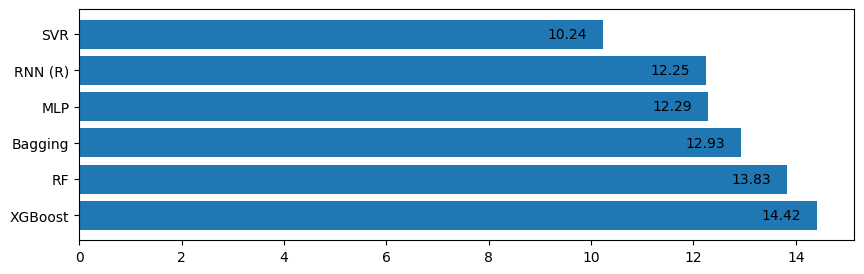

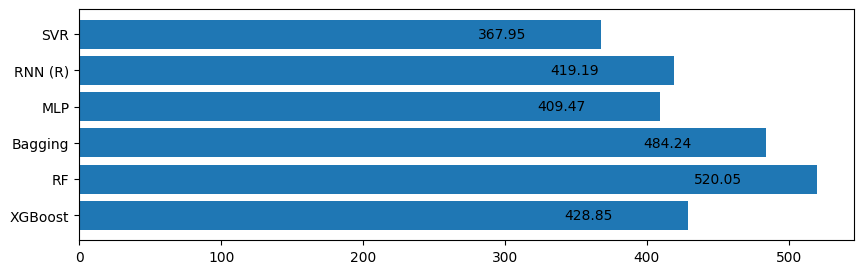

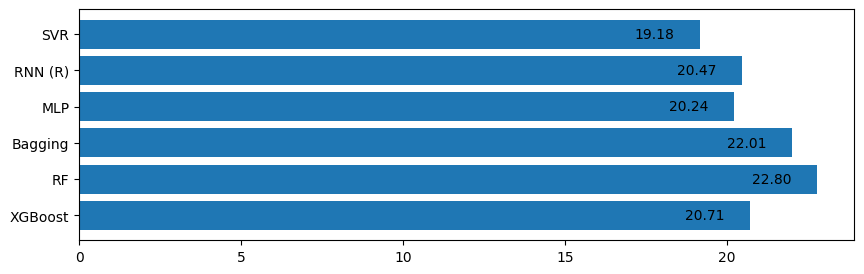

In [27]:

width = 10
height = 3


df_sorted = df.sort_values(by='MAE', ascending=False)
# Plotando o gráfico de barras
# Definir a variável de distância
distancia = .7

# Plotar o gráfico de barras para MAE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MAE'])
for i, mae in enumerate(df_sorted['MAE']): 
    plt.text(mae - distancia, i, f'{mae:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/maeModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plotar o gráfico de barras para MSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MSE'])
for i, MSE in enumerate(df_sorted['MSE']): 
    plt.text(MSE - (distancia*100), i, f'{MSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/MSEModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Plotar o gráfico de barras para RMSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['RMSE'])
for i, RMSE in enumerate(df_sorted['RMSE']): 
    plt.text(RMSE - distancia*2, i, f'{RMSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/RMSEModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

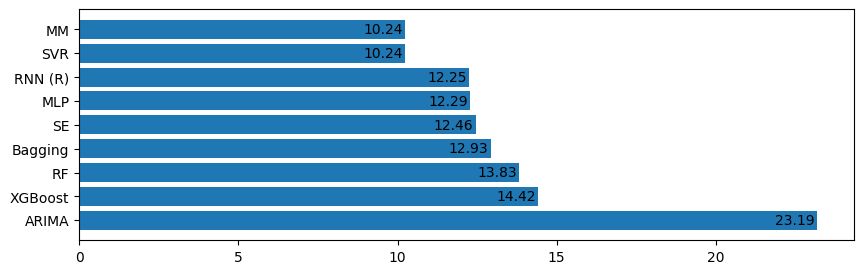

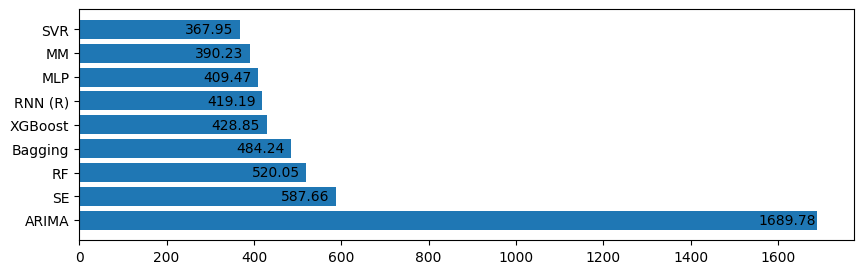

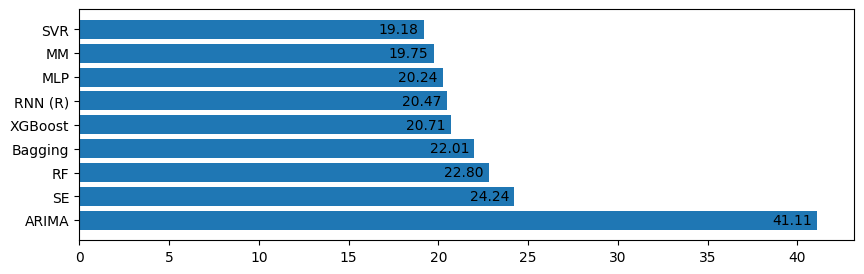

In [28]:

width = 10
height = 3


df = pd.concat([df, dfEstatistico])


df_sorted = df.sort_values(by='MAE', ascending=False)
# Plotando o gráfico de barras
# Definir a variável de distância
distancia = .7

# Plotar o gráfico de barras para MAE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MAE'])
for i, mae in enumerate(df_sorted['MAE']): 
    plt.text(mae - distancia, i, f'{mae:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-maeModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

df_sorted = df.sort_values(by='MSE', ascending=False)
# Plotar o gráfico de barras para MSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MSE'])
for i, MSE in enumerate(df_sorted['MSE']): 
    plt.text(MSE - (distancia*100), i, f'{MSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-MSEModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

df_sorted = df.sort_values(by='RMSE', ascending=False)
# Plotar o gráfico de barras para RMSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['RMSE'])
for i, RMSE in enumerate(df_sorted['RMSE']): 
    plt.text(RMSE - distancia*2, i, f'{RMSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-RMSEModelos.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
dfrnn1 = pd.read_csv("resultadosModelos/dfrnn1.csv", sep=';')
dflstm1 = pd.read_csv("resultadosModelos/dflstm1.csv", sep=';')
dflstm2 = pd.read_csv("resultadosModelos/dflstm2.csv", sep=';')
dflstm3 = pd.read_csv("resultadosModelos/dflstm3.csv", sep=';')
dfgru1 = pd.read_csv("resultadosModelos/dfgru1.csv", sep=';')
dfgru2 = pd.read_csv("resultadosModelos/dfgru2.csv", sep=';')
dfgru3 = pd.read_csv("resultadosModelos/dfgru3.csv", sep=';')
dflstm1gru1 = pd.read_csv("resultadosModelos/dflstm1gru1.csv", sep=';')
dflstm1gru1_2 = pd.read_csv("resultadosModelos/dflstm1Gru1_2.csv", sep=';')

# Obtendo as últimas três colunas de cada DataFrame

rnn1 = dfrnn1.iloc[:, -3:]
lstm1 = dflstm1.iloc[:, -3:]
lstm2 = dflstm2.iloc[:, -3:]
lstm3 = dflstm3.iloc[:, -3:]
gru1 = dfgru1.iloc[:, -3:]
gru2 = dfgru2.iloc[:, -3:]
gru3 = dfgru3.iloc[:, -3:]
lstm1gru1 = dflstm1gru1.iloc[:, -3:]
lstm1gru1_2 = dflstm1gru1_2.iloc[:, -3:]



rnn1 = rnn1.tail(1)
lstm1 = lstm1.tail(1)
lstm2= lstm2.tail(1)
lstm3 = lstm3.tail(1)
gru1 = gru1.tail(1)
gru2 = gru2.tail(1)
gru3 = gru3.tail(1)
lstm1gru1 = lstm1gru1.tail(1)
lstm1gru1_2 = lstm1gru1_2.tail(1)

# Concatenando as últimas três colunas de todos os DataFrames em um novo DataFrame
dfRnn = pd.concat([rnn1, lstm1, lstm2, lstm3, gru1, gru2,gru3,lstm1gru1,lstm1gru1_2])

# Definindo o índice do DataFrame como o nome dos modelos
dfRnn.index = ['R', 'R1L', 'R2L', 'R3L', 'R1G', 'R2G', 'R3G', 'R1L1G', 'R1L1G1L1G']

# Exibindo o novo DataFrame
display(dfRnn)

dfRnn.to_latex("resultadosModelos/dfRnn.tex", index=True)


,MAE,MSE,RMSE
R,12.25,419.19,20.47
R1L,14.88,577.63,24.03
R2L,16.52,810.12,28.46
R3L,14.76,667.97,25.85
R1G,14.43,577.83,24.04
R2G,16.28,821.69,28.67
R3G,16.16,985.34,31.39
R1L1G,16.12,705.89,26.57
R1L1G1L1G,13.78,551.48,23.48


,MAE,MSE,RMSE
R2L,16.52,810.12,28.46
R2G,16.28,821.69,28.67
R3G,16.16,985.34,31.39
R1L1G,16.12,705.89,26.57
R1L,14.88,577.63,24.03
R3L,14.76,667.97,25.85
R1G,14.43,577.83,24.04
R1L1G1L1G,13.78,551.48,23.48
R,12.25,419.19,20.47


<Figure size 640x480 with 0 Axes>

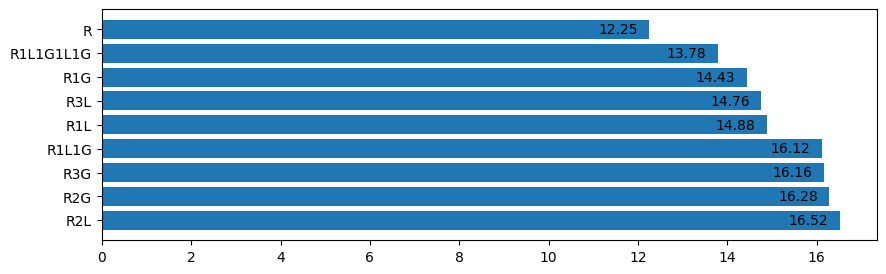

,MAE,MSE,RMSE
R3G,16.16,985.34,31.39
R2G,16.28,821.69,28.67
R2L,16.52,810.12,28.46
R1L1G,16.12,705.89,26.57
R3L,14.76,667.97,25.85
R1G,14.43,577.83,24.04
R1L,14.88,577.63,24.03
R1L1G1L1G,13.78,551.48,23.48
R,12.25,419.19,20.47


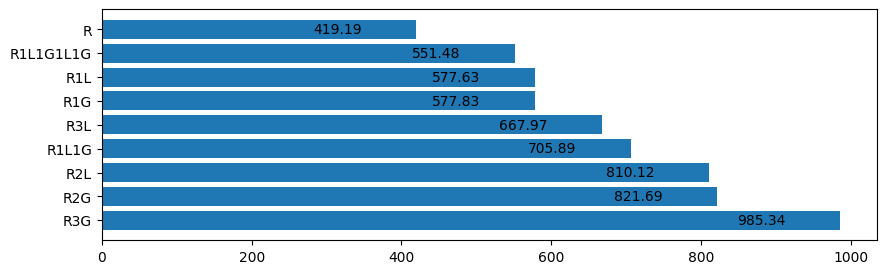

,MAE,MSE,RMSE
R3G,16.16,985.34,31.39
R2G,16.28,821.69,28.67
R2L,16.52,810.12,28.46
R1L1G,16.12,705.89,26.57
R3L,14.76,667.97,25.85
R1G,14.43,577.83,24.04
R1L,14.88,577.63,24.03
R1L1G1L1G,13.78,551.48,23.48
R,12.25,419.19,20.47


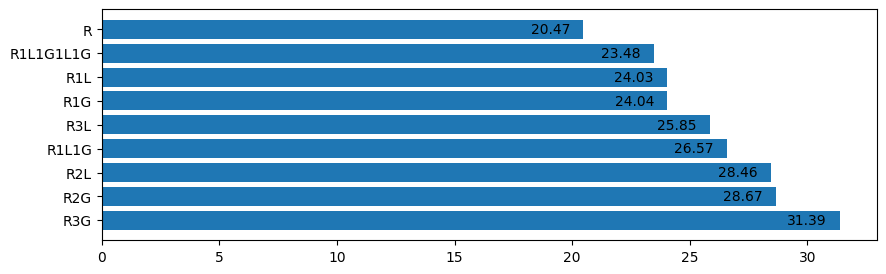

In [30]:
width = 10
height = 3

plt.clf()



# Plotando o gráfico de barras
# Definir a variável de distância
distancia = .7

df_sorted = dfRnn.sort_values(by='MAE', ascending=False)
display(df_sorted)
# Plotar o gráfico de barras para MSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MAE'])
for i, MSE in enumerate(df_sorted['MAE']): 
    plt.text(MSE - (distancia), i, f'{MSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-MAE-RNN.pdf', dpi=300, bbox_inches='tight')
plt.show()



df_sorted = dfRnn.sort_values(by='MSE', ascending=False)
display(df_sorted)
# Plotar o gráfico de barras para MSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['MSE'])
for i, MSE in enumerate(df_sorted['MSE']): 
    plt.text(MSE - (distancia*150), i, f'{MSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-MSE-RNN.pdf', dpi=300, bbox_inches='tight')
plt.show()

df_sorted = dfRnn.sort_values(by='RMSE', ascending=False)
display(df_sorted)

# Plotar o gráfico de barras para RMSE
plt.figure(figsize=(width, height))
plt.barh(df_sorted.index, df_sorted['RMSE'])
for i, RMSE in enumerate(df_sorted['RMSE']): 
    plt.text(RMSE - distancia*2, i, f'{RMSE:.2f}', color='black', ha='center', va='center')
plt.savefig('graficos/5-RMSE-RNN.pdf', dpi=300, bbox_inches='tight')
plt.show()